In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.io as sio
%matplotlib inline

In [2]:
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

# K-means聚类

## 读取数据

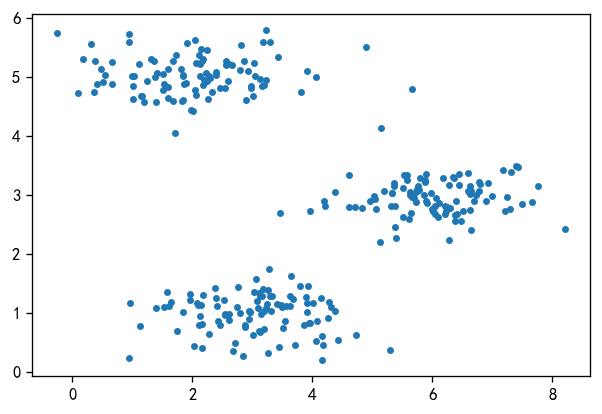

In [3]:
paths = glob.glob("../Coursera-ML-AndrewNg-master/*kmeans*/data/*.mat")
data = sio.loadmat(paths[2])
keys = list(data.keys())
datax = data[keys[-1]]
plt.figure(dpi=120)
plt.scatter(datax[:, 0], datax[:, 1], s=10)
plt.show()

## 初始化样本类别

In [4]:
def initCluster(x, pivot):
    """初始化样本类别

    Parameters
    ----------
    x : ndarray
        输入样本
    pivot : ndarray
        聚类中心

    Returns
    -------
    idx : ndarray
        返回最小距离的pivot索引
    """    
    idx = list()
    for i in range(len(x)):
        dist = np.linalg.norm(x[i] - pivot, axis=1) # 计算样本到聚类中心的欧氏距离
        idx.append(np.argmin(dist)) # 赋予类别
    return np.array(idx)

## 更新聚类中心点

In [5]:
def meansPivot(x, idx, pivot):
    for i in range(pivot.shape[0]):
        pivot[i] = np.mean(x[idx == i], axis=0)
    return pivot

## 遴选聚类中心点

In [6]:
k = np.random.choice(datax.shape[0], 3, replace=False)
pivot = datax[k]
iters = 100
for _ in range(iters):
    idx = initCluster(datax, pivot)
    meansPivot(datax, idx, pivot)

## 聚类结果

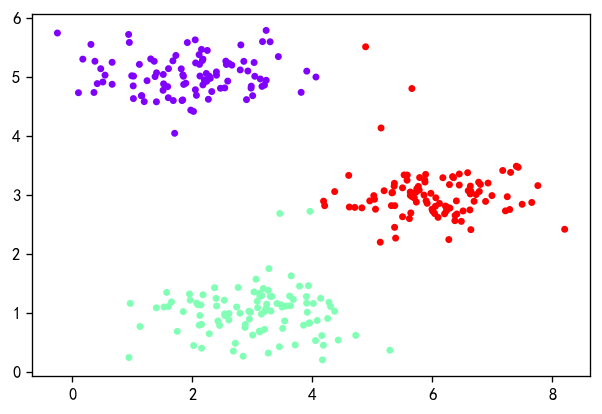

In [7]:
plt.figure(dpi=120)
plt.scatter(datax[:, 0], datax[:, 1], c=idx, s=10, cmap="rainbow")

## 读取图片

(-0.5, 127.5, 127.5, -0.5)

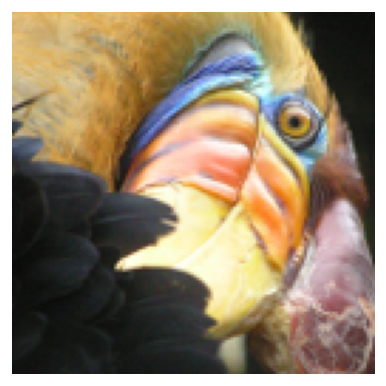

In [8]:
data = sio.loadmat(paths[0])
img = data["A"]
plt.figure(dpi=120)
plt.imshow(img)
plt.axis("off")

## 像素聚类

In [9]:
k = 16
perimeter = img.reshape((-1, 3)) / 256
pivot = perimeter[np.random.choice(len(perimeter), k)]
for _ in range(iters):
    idx = initCluster(perimeter, pivot)
    meansPivot(perimeter, idx, pivot)

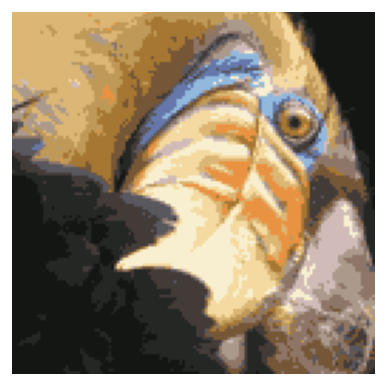

In [10]:
for i in range(k):
    perimeter[idx == i] = pivot[i]
img = perimeter.reshape((128, 128, 3))
plt.figure(dpi=120)
plt.imshow(img)
plt.axis("off")
plt.show()